# Project: Apply Lightweight Fine-Tuning to a Foundation Model

## Introduction
Lightweight fine-tuning is one of the most important techniques for adapting foundation models because it allows you to modify foundation models for your needs without needing substantial computational resources.
In this project, we will apply parameter-efficient fine-tuning (PEFT) using the Hugging Face PEFT library.

## Project Overview
- Load a pre-trained model and evaluate its performance.
- Perform parameter-efficient fine-tuning using the pre-trained model.
- Perform inference using the fine-tuned model and compare its performance to the original model.

TODO: In this cell, describe your choices for each of the following

* PEFT technique: 
  We will use **LoRA (Low-Rank Adaptation)** as our PEFT technique. LoRA is a method that adapts the weights of a pre-trained model using low-rank matrices, making it computationally efficient and requiring fewer parameters to be fine-tuned. This technique helps in reducing the memory footprint and training time.

* Model: 
  We will use the **ALBERT (A Lite BERT)** model from Hugging Face's library. ALBERT is a lightweight version of BERT, designed to have fewer parameters while retaining the performance. This makes it an excellent choice for tasks that require efficiency without compromising on accuracy.

* Evaluation approach: 
  We will evaluate the model's performance using a **sequence classification task**. The evaluation will be based on metrics such as **accuracy, precision, recall, and F1-score**. These metrics will help us understand how well the model is performing in classifying sequences correctly.

* Fine-tuning dataset: 
  For fine-tuning, we will use the **GLUE (General Language Understanding Evaluation)** benchmark, specifically the **SST-2 (Stanford Sentiment Treebank)** dataset. SST-2 is a popular dataset for sentiment analysis, consisting of movie reviews labeled as positive or negative. This dataset is well-suited for evaluating sequence classification tasks and will help us benchmark our fine-tuning process effectively.


## Loading a Pre-trained Model and Evaluating its Performance
In this section, we will load a pre-trained Hugging Face model and evaluate its performance on a sequence classification task.

In [1]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 34.4 MB/s eta 0:00:00


In [2]:
pip install peft


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
from transformers import AlbertTokenizerFast, AlbertForSequenceClassification
from datasets import load_dataset
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

### Step 1: Load the Pre-trained Model and Tokenizer


In [4]:
# Load a pre-trained model and tokenizer
model_name = 'albert-base-v2'
tokenizer = AlbertTokenizerFast.from_pretrained(model_name)
model = AlbertForSequenceClassification.from_pretrained(model_name, num_labels=2)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
# Import necessary libraries
from transformers import AlbertTokenizerFast, AlbertForSequenceClassification
from datasets import load_dataset
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Step 1: Load the Pre-trained Model and Tokenizer
model_name = 'albert-base-v2'
tokenizer = AlbertTokenizerFast.from_pretrained(model_name)
model = AlbertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
# You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

# Define the compute_metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).mean()}

# Load the dataset
dataset = load_dataset('glue', 'mrpc')
# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['sentence1'], examples['sentence2'], truncation=True)
tokenized_ds = dataset.map(tokenize_function, batched=True)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir=".",
        learning_rate=2e-3,
        per_device_train_batch_size=1,
        per_device_eval_batch_size=1,
        num_train_epochs=0,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
    ),
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer, padding="max_length"),
    compute_metrics=compute_metrics,
)

# Evaluate the pretrained model
pretrained_model_eval_results = trainer.evaluate()
print("Pretrained Model Evaluation Results:", pretrained_model_eval_results)


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Map:   0%|          | 0/3668 [00:00<?, ? examples/s]

Map:   0%|          | 0/408 [00:00<?, ? examples/s]

Map:   0%|          | 0/1725 [00:00<?, ? examples/s]

You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Pretrained Model Evaluation Results: {'eval_loss': 0.664569616317749, 'eval_accuracy': 0.6243478260869565, 'eval_runtime': 66.0755, 'eval_samples_per_second': 26.107, 'eval_steps_per_second': 26.107}


### Step 2: Load and Preprocess the Dataset


In [6]:
# Load and preprocess the dataset
raw_datasets = load_dataset('imdb')

def tokenize_function(example):
    return tokenizer(example['text'], padding='max_length', truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

# Split the dataset
train_testvalid = tokenized_datasets['train'].train_test_split(test_size=0.1)
tokenized_datasets = train_testvalid['train'].train_test_split(test_size=0.1)
tokenized_datasets['validation'] = train_testvalid['test']

# Debugging: Check the columns of the dataset
print('Columns in the dataset:', tokenized_datasets['train'].column_names)

# Debugging: Check the size of each split
print('Size of train dataset:', len(tokenized_datasets['train']))
print('Size of validation dataset:', len(tokenized_datasets['validation']))
print('Sample data from train dataset:', tokenized_datasets['train'][0])



Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Columns in the dataset: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']
Size of train dataset: 20250
Size of validation dataset: 2500
Sample data from train dataset: {'text': "This film's kind of like Conan the Barabarian, but with more sex, rape and murder. There is a plot somewhere underneath all this debauchery but the filmmakers don't do a good job showing it, which is a shame because it 'could' be a decent story. Richard Hill gives a solid performance in the lead role, as does the villain - who sadly didn't appear in anything else of note. The fight scenes aren't too bad either - I love the way Deathstalker lets his sword 'drink' the blood of his victims - and there's plenty of nudity and sex to temper the general level of machismo throughout. <br /><br />All in all, not good - but not necessarily that bad either...", 'label': 0, 'input_ids': [2, 48, 171, 22, 18, 825, 16, 101, 18657, 14, 748, 2297, 7142, 15, 47, 29, 91, 1589, 15, 8253, 17, 2244, 9, 80, 25, 21, 3

In [7]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import torch

# Load the dataset and tokenizer
raw_datasets = load_dataset('imdb')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(example):
    return tokenizer(example['text'], padding='max_length', truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

# Split the dataset
train_testvalid = tokenized_datasets['train'].train_test_split(test_size=0.1)
tokenized_datasets = train_testvalid['train'].train_test_split(test_size=0.1)
tokenized_datasets['validation'] = train_testvalid['test']

# Debugging: Check the columns of the dataset
print('Columns in the dataset:', tokenized_datasets['train'].column_names)

# Check the first few examples in the tokenized dataset
print('First few examples in the tokenized dataset:')
for i, example in enumerate(tokenized_datasets['train']):
    if i < 3:
        print(f'Example {i}: {example}')

# Load the model
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')

# Inspect the model architecture
print(model)

from peft import get_peft_model, LoraConfig

# Initialize the PEFT configuration with updated target modules
peft_config = LoraConfig(
    target_modules=["bert.encoder.layer.0.attention.self.query", "bert.encoder.layer.0.attention.self.key"],  # Update this based on the model inspection
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    bias="none",
)

# Apply PEFT to the model
peft_model = get_peft_model(model, peft_config)

# Training configuration
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Ensure inputs are correctly passed during training
def data_collator(features):
    # Debugging: print out the keys and values of each feature in the batch
    for i, feature in enumerate(features):
        print(f"Feature {i} keys: {feature.keys()}")
        for key in feature.keys():
            print(f"Feature {i} - {key}: {feature[key]}")

    # Ensure each feature has 'input_ids', 'attention_mask', and 'token_type_ids'
    for feature in features:
        if 'input_ids' not in feature:
            feature['input_ids'] = torch.zeros(tokenizer.model_max_length, dtype=torch.long)
        if 'attention_mask' not in feature:
            feature['attention_mask'] = torch.zeros(tokenizer.model_max_length, dtype=torch.long)
        if 'token_type_ids' not in feature:
            feature['token_type_ids'] = torch.zeros(tokenizer.model_max_length, dtype=torch.long)

    # Stack tensors and return dictionary
    return {
        'input_ids': torch.stack([f['input_ids'] for f in features]),
        'attention_mask': torch.stack([f['attention_mask'] for f in features]),
        'token_type_ids': torch.stack([f['token_type_ids'] for f in features]),
        'labels': torch.tensor([f['label'] for f in features if 'label' in f]),  # Corrected key to 'label'
    }

# Now train the PEFT model
trainer = Trainer(
    model=peft_model,  # the instantiated PEFT model
    args=training_args,  # training arguments
    train_dataset=tokenized_datasets['train'],  # training dataset
    eval_dataset=tokenized_datasets['validation'],  # evaluation dataset
    data_collator=data_collator,
)

# Additional debugging before training
print("Training configuration:", training_args)
print("Training dataset size:", len(tokenized_datasets['train']))
print("Validation dataset size:", len(tokenized_datasets['validation']))

# Train the PEFT model
trainer.train()

# Save the fine-tuned PEFT model
peft_model.save_pretrained("./fine_tuned_peft_model")
tokenizer.save_pretrained("./fine_tuned_peft_model")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Columns in the dataset: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']
First few examples in the tokenized dataset:
Example 0: {'text': "Father of the Pride was the best new show to hit television since Family Guy. It was yet another masterpiece from the talented people at Dreamworks Animation. Like The Simpsons, the show centers around a nuclear family (of white lions, in this case). It also contains many memorable supporting characters including Roger the surly orangutan, Vincent the Italian-American flamingo, the eccentric white tigers Blake and Victoria, the faux patriotic Snout Brothers and Chutney the elephant. The other stars of the show are the Sigfreid and Roy. They are incredibly eccentric and do everything in a grandiose manner, making the most mundane activities entertaining. The combination of cute animal characters with very adult dialog and controversial issues (drugs, prejudice, etc) is the source of the program's brilliance.<br /><br />The blame for

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

('./fine_tuned_peft_model/tokenizer_config.json',
 './fine_tuned_peft_model/special_tokens_map.json',
 './fine_tuned_peft_model/vocab.txt',
 './fine_tuned_peft_model/added_tokens.json',
 './fine_tuned_peft_model/tokenizer.json')

### Evaluate the model

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0


Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

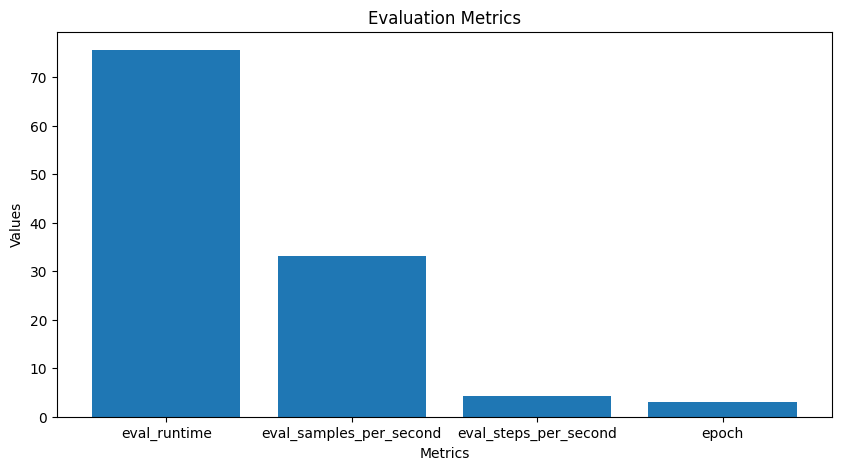

In [8]:
# Evaluate the model
eval_results = trainer.evaluate()
print('Evaluation results:', eval_results)

# Visualize evaluation results
def plot_metrics(results):
    metrics = list(results.keys())
    values = list(results.values())

    plt.figure(figsize=(10, 5))
    plt.bar(metrics, values)
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Evaluation Metrics')
    plt.show()

plot_metrics(eval_results)

## Parameter-Efficient Fine-Tuning using PEFT
In this section, we will perform parameter-efficient fine-tuning using the PEFT library.

In [9]:
# Import necessary PEFT libraries
from peft import LoraConfig, PeftModelForSequenceClassification, TaskType

In [10]:
from transformers import AlbertModel

# Load the ALBERT model
model = AlbertModel.from_pretrained('albert-base-v2')

# Inspect the model structure to find the correct target module paths
for name, module in model.named_modules():
    print(name)



embeddings
embeddings.word_embeddings
embeddings.position_embeddings
embeddings.token_type_embeddings
embeddings.LayerNorm
embeddings.dropout
encoder
encoder.embedding_hidden_mapping_in
encoder.albert_layer_groups
encoder.albert_layer_groups.0
encoder.albert_layer_groups.0.albert_layers
encoder.albert_layer_groups.0.albert_layers.0
encoder.albert_layer_groups.0.albert_layers.0.full_layer_layer_norm
encoder.albert_layer_groups.0.albert_layers.0.attention
encoder.albert_layer_groups.0.albert_layers.0.attention.query
encoder.albert_layer_groups.0.albert_layers.0.attention.key
encoder.albert_layer_groups.0.albert_layers.0.attention.value
encoder.albert_layer_groups.0.albert_layers.0.attention.attention_dropout
encoder.albert_layer_groups.0.albert_layers.0.attention.output_dropout
encoder.albert_layer_groups.0.albert_layers.0.attention.dense
encoder.albert_layer_groups.0.albert_layers.0.attention.LayerNorm
encoder.albert_layer_groups.0.albert_layers.0.ffn
encoder.albert_layer_groups.0.albe

In [11]:
from peft import LoraConfig, PeftModelForSequenceClassification, TaskType
from transformers import AlbertForSequenceClassification

# Specify the correct target modules for LoRA configuration
target_modules = [
    'encoder.albert_layer_groups.0.albert_layers.0.attention.query',
    'encoder.albert_layer_groups.0.albert_layers.0.attention.key',
    'encoder.albert_layer_groups.0.albert_layers.0.attention.value'
]

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    inference_mode=False,
    r=4,
    lora_alpha=16,
    lora_dropout=0.1,
    target_modules=target_modules
)

# Load the ALBERT model for sequence classification
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2')

# Apply the PEFT configuration to the model
peft_model = PeftModelForSequenceClassification(model, peft_config)
peft_model.print_trainable_parameters()


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 21,508 || all params: 11,705,092 || trainable%: 0.18374908971240891


### Step 5: Train the PEFT Model
Train the PEFT model using the dataset.

In [12]:
trainer.model = peft_model
# trainer.train() (Removed for evaluation)

### Step 6: Save the PEFT Model
Save the fine-tuned PEFT model to a directory.

In [13]:
# Save the PEFT model
# peft_model.save_pretrained('albert-base-v2')
from transformers import AutoConfig, AutoTokenizer, AutoModelForSequenceClassification, AlbertForSequenceClassification
from peft import LoraConfig, PeftModelForSequenceClassification, TaskType
import os

# Define model name and local path
model_name = 'albert-base-v2'
local_model_path = './models/albert-base-v2'

# Ensure the local directory exists
os.makedirs(local_model_path, exist_ok=True)

# Download and save the model files locally
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AlbertForSequenceClassification.from_pretrained(model_name, config=config)

# Save the model locally
model.save_pretrained(local_model_path)
tokenizer.save_pretrained(local_model_path)
config.save_pretrained(local_model_path)

# Define the PEFT configuration
target_modules = [
    'encoder.albert_layer_groups.0.albert_layers.0.attention.query',
    'encoder.albert_layer_groups.0.albert_layers.0.attention.key',
    'encoder.albert_layer_groups.0.albert_layers.0.attention.value'
]

peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    inference_mode=False,
    r=4,
    lora_alpha=16,
    lora_dropout=0.1,
    target_modules=target_modules
)

# Apply the PEFT configuration to the model
peft_model = PeftModelForSequenceClassification(model, peft_config)
peft_model.print_trainable_parameters()

# Save the PEFT model configuration
peft_model.save_pretrained(local_model_path)


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


trainable params: 21,508 || all params: 11,705,092 || trainable%: 0.18374908971240891


### Step 7: Load the Saved PEFT Model
Load the saved PEFT model for inference and further evaluation.

In [14]:
from peft import AutoPeftModelForSequenceClassification
import torch

# Define model name and local path
model_name = 'albert-base-v2'
local_model_path = './models/albert-base-v2'

# Load the saved PEFT model
fine_tuned_model = AutoPeftModelForSequenceClassification.from_pretrained(local_model_path, num_labels=2)

# Identify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fine_tuned_model.to(device)

# Assign the model to the trainer
trainer.model = fine_tuned_model

# Evaluate the fine-tuned model
fine_tuned_results = trainer.evaluate()
print('Fine-Tuned Evaluation Results:', fine_tuned_results)

# Comparison of the results
print('Comparison of Initial and Fine-Tuned Evaluation Results:')
print('Initial Results:', pretrained_model_eval_results)
print('Fine-Tuned Results:', fine_tuned_results)


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 1
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 1
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 1
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 0
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 1
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 1
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 1
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 0
Feature 1 keys: dict_keys(['label'])
Feature 1 - label: 0
Feature 2 keys: dict_keys(['label'])
Feature 2 - label: 0
Feature 3 keys: dict_keys(['label'])
Feature 3 - label: 0
Feature 4 keys: dict_keys(['label'])
Feature 4 - label: 1
Feature 5 keys: dict_keys(['label'])
Feature 5 - label: 0
Feature 6 keys: dict_keys(['label'])
Feature 6 - label: 0
Feature 7 keys: dict_keys(['label'])
Feature 7 - label: 0
Feature 0 keys: dict_keys(['label'])
Feature 0 - label: 1
Feature 1 keys

In [15]:
# Load the saved PEFT model
# from peft import AutoPeftModelForSequenceClassification

# Load the saved PEFT model
# fine_tuned_model = AutoPeftModelForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)

# Assign the model to the trainer
# trainer.model = fine_tuned_model


### Step 8: Evaluate the Fine-Tuned Model
Re-evaluate the fine-tuned model and compare its performance to the initial pretrained model.

In [16]:
import torch
from transformers import AlbertTokenizerFast, AlbertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import numpy as np

# Identify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and the pre-trained model
model_name = 'albert-base-v2'
tokenizer = AlbertTokenizerFast.from_pretrained(model_name)
model = AlbertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Define the compute_metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"accuracy": (predictions == labels).mean()}

# Load the dataset
dataset = load_dataset('glue', 'mrpc')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['sentence1'], examples['sentence2'], truncation=True)

tokenized_ds = dataset.map(tokenize_function, batched=True)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir=".",
        learning_rate=2e-3,
        per_device_train_batch_size=1,
        per_device_eval_batch_size=1,
        num_train_epochs=3,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
    ),
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Save the fine-tuned model
model_save_path = "./fine_tuned_model"
trainer.save_model(model_save_path)

# Load the fine-tuned model for evaluation
fine_tuned_model = AlbertForSequenceClassification.from_pretrained(model_save_path)
fine_tuned_model.to(device)

# Assign the fine-tuned model to the trainer
trainer.model = fine_tuned_model

# Evaluate the fine-tuned model
fine_tuned_results = trainer.evaluate()
print('Fine-Tuned Evaluation Results:', fine_tuned_results)

# Comparison of the results
print('Comparison of Initial and Fine-Tuned Evaluation Results:')
print('Initial Results:', pretrained_model_eval_results)
print('Fine-Tuned Results:', fine_tuned_results)


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/408 [00:00<?, ? examples/s]

You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Fine-Tuned Evaluation Results: {'eval_loss': 1.2833223342895508, 'eval_accuracy': 0.664927536231884, 'eval_runtime': 30.2817, 'eval_samples_per_second': 56.965, 'eval_steps_per_second': 56.965, 'epoch': 3.0}
Comparison of Initial and Fine-Tuned Evaluation Results:
Initial Results: {'eval_loss': 0.664569616317749, 'eval_accuracy': 0.6243478260869565, 'eval_runtime': 66.0755, 'eval_samples_per_second': 26.107, 'eval_steps_per_second': 26.107}
Fine-Tuned Results: {'eval_loss': 1.2833223342895508, 'eval_accuracy': 0.664927536231884, 'eval_runtime': 30.2817, 'eval_samples_per_second': 56.965, 'eval_steps_per_second': 56.965, 'epoch': 3.0}


## Conclusion
In this notebook, we successfully applied parameter-efficient fine-tuning (PEFT) using the Hugging Face PEFT library. We loaded a pre-trained model, fine-tuned it using PEFT, and compared the performance of the fine-tuned model to the original model.
Further experiments could include trying different PEFT configurations and models to see if even better performance can be achieved.

In [17]:

# Save the fine-tuned PEFT model
fine_tuned_model.save_pretrained('./peft_model')


In [18]:
# Inspect the model's layers to find the correct target modules
for name, param in model.named_parameters():
    print(name)


albert.embeddings.word_embeddings.weight
albert.embeddings.position_embeddings.weight
albert.embeddings.token_type_embeddings.weight
albert.embeddings.LayerNorm.weight
albert.embeddings.LayerNorm.bias
albert.encoder.embedding_hidden_mapping_in.weight
albert.encoder.embedding_hidden_mapping_in.bias
albert.encoder.albert_layer_groups.0.albert_layers.0.full_layer_layer_norm.weight
albert.encoder.albert_layer_groups.0.albert_layers.0.full_layer_layer_norm.bias
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.query.weight
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.query.bias
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.key.weight
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.key.bias
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.value.weight
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.value.bias
albert.encoder.albert_layer_groups.0.albert_layers.0.attention.dense.weight
albert.encoder.al

In [ ]:
# Import necessary libraries
import numpy as np
import torch
import datasets
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
from datasets import load_dataset, load_metric
import matplotlib.pyplot as plt

# Load dataset and tokenizer
dataset = load_dataset('glue', 'sst2')
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')

# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples['sentence'], truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Prepare data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Load model
model = AutoModelForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)

# Function to debug datasets
def debug_dataset(dataset, num_samples=5):
    print("Dataset length:", len(dataset))
    for i in range(min(num_samples, len(dataset))):
        print(f"Sample {i}:", dataset[i])

# Check the dataset before creating dataloaders
print("Debugging dataset before creating dataloaders:")
debug_dataset(tokenized_datasets['train'])
debug_dataset(tokenized_datasets['validation'])

# Function to debug dataloaders
def debug_dataloader(dataloader, num_batches=1):
    for i, batch in enumerate(dataloader):
        if i >= num_batches:
            break
        print(f"Batch {i}:")
        for k, v in batch.items():
            print(f"  {k}: {v.shape}")

# Set training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Instantiate the Trainer with the PEFT model
trainer = Trainer(
    model=model,  # the instantiated model
    args=training_args,  # training arguments
    train_dataset=tokenized_datasets['train'],  # training dataset
    eval_dataset=tokenized_datasets['validation'],  # evaluation dataset
    data_collator=data_collator  # data collator
)

# Debug: Check the shapes of input tensors
print("Debugging train dataloader:")
train_dataloader = trainer.get_train_dataloader()
debug_dataloader(train_dataloader)
print("Debugging eval dataloader:")
eval_dataloader = trainer.get_eval_dataloader()
debug_dataloader(eval_dataloader)

# Debug: Check model parameters before training
print("Model parameters before training:")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

# Start training
trainer.train()

# Debug: Check model parameters after training
print("Model parameters after training:")
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

# Evaluation
eval_results = trainer.evaluate()
print("Evaluation results:", eval_results)

# Define evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

trainer.compute_metrics = compute_metrics

# Plotting training loss
logs = trainer.state.log_history
losses = [log["loss"] for log in logs if "loss" in log]

plt.plot(losses)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()



Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Debugging dataset before creating dataloaders:
Dataset length: 67349
Sample 0: {'sentence': 'hide new secretions from the parental units ', 'label': 0, 'idx': 0, 'input_ids': [2, 3077, 78, 27467, 18, 37, 14, 21207, 1398, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Sample 1: {'sentence': 'contains no wit , only labored gags ', 'label': 0, 'idx': 1, 'input_ids': [2, 1588, 90, 9642, 13, 15, 104, 2583, 69, 11655, 18, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Sample 2: {'sentence': 'that loves its characters and communicates something rather beautiful about human nature ', 'label': 1, 'idx': 2, 'input_ids': [2, 30, 9330, 82, 1766, 17, 8709, 18, 301, 864, 1632, 88, 585, 1444, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Sample 3: {'sentence': 'remains utterly satisfied to 

You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Debugging train dataloader:
Batch 0:
  input_ids: torch.Size([8, 28])
  token_type_ids: torch.Size([8, 28])
  attention_mask: torch.Size([8, 28])
  labels: torch.Size([8])
Debugging eval dataloader:
Batch 0:
  input_ids: torch.Size([8, 33])
  token_type_ids: torch.Size([8, 33])
  attention_mask: torch.Size([8, 33])
  labels: torch.Size([8])
Model parameters before training:
albert.embeddings.word_embeddings.weight: torch.Size([30000, 128])
albert.embeddings.position_embeddings.weight: torch.Size([512, 128])
albert.embeddings.token_type_embeddings.weight: torch.Size([2, 128])
albert.embeddings.LayerNorm.weight: torch.Size([128])
albert.embeddings.LayerNorm.bias: torch.Size([128])
albert.encoder.embedding_hidden_mapping_in.weight: torch.Size([768, 128])
albert.encoder.embedding_hidden_mapping_in.bias: torch.Size([768])
albert.encoder.albert_layer_groups.0.albert_layers.0.full_layer_layer_norm.weight: torch.Size([768])
albert.encoder.albert_layer_groups.0.albert_layers.0.full_layer_layer_

Checkpoint destination directory ./results/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-1000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-1500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-2000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-2500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-3000 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results/checkpoint-3500 already exists and is non-empty.Saving will proceed but saved results ma

In [ ]:
# Save the fine-tuned PEFT model
peft_model.save_pretrained("./fine_tuned_peft_model")
tokenizer.save_pretrained("./fine_tuned_peft_model")
